In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel('data.xlsx', sheet_name='Sheet1')

In [3]:
df.head()

,year,country,iso,ifs,pop,rgdpmad,rgdpbarro,rconsbarro,gdp,iy,...,eq_capgain,eq_dp,eq_capgain_interp,eq_tr_interp,eq_dp_interp,bond_rate,eq_div_rtn,capital_tr,risky_tr,safe_tr
0,1870,Australia,AUS,193,1775.0,3273.239437,13.836157,21.449734,208.78,0.109266,...,-0.070045,0.071417,NaN,NaN,NaN,0.049118,0.066415,NaN,NaN,NaN
1,1871,Australia,AUS,193,1675.0,3298.507463,13.936864,19.930801,211.56,0.104579,...,0.041654,0.065466,NaN,NaN,NaN,0.048446,0.068193,NaN,NaN,NaN
2,1872,Australia,AUS,193,1722.0,3553.426249,15.044247,21.085006,227.40,0.130438,...,0.108945,0.062997,NaN,NaN,NaN,0.047373,0.069861,NaN,NaN,NaN
3,1873,Australia,AUS,193,1769.0,3823.629169,16.219443,23.254910,266.54,0.124986,...,0.083086,0.064484,NaN,NaN,NaN,0.046720,0.069842,NaN,NaN,NaN
4,1874,Australia,AUS,193,1822.0,3834.796926,16.268228,23.458050,287.58,0.141960,...,0.119389,0.063503,NaN,NaN,NaN,0.046533,0.071085,NaN,NaN,NaN


In [4]:
df.shape[0]

2718

In [5]:
df.dtypes

year                          int64
country                      object
iso                          object
ifs                           int64
pop                         float64
rgdpmad                     float64
rgdpbarro                   float64
rconsbarro                  float64
gdp                         float64
iy                          float64
cpi                         float64
ca                          float64
imports                     float64
exports                     float64
narrowm                     float64
money                       float64
stir                        float64
ltrate                      float64
hpnom                       float64
unemp                       float64
wage                        float64
debtgdp                     float64
revenue                     float64
expenditure                 float64
xrusd                       float64
tloans                      float64
tmort                       float64
thh                         

In [6]:
df = df.sort_values(by=['country', 'year'])
df['gdp_growth'] = df.groupby('country')['gdp'].pct_change() * 100
df[['country', 'year', 'gdp', 'gdp_growth']].head()

C:\Users\59747\AppData\Local\Temp\ipykernel_36468\3974986566.py:2: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['gdp_growth'] = df.groupby('country')['gdp'].pct_change() * 100


,country,year,gdp,gdp_growth
0,Australia,1870,208.78,NaN
1,Australia,1871,211.56,1.331545
2,Australia,1872,227.40,7.487238
3,Australia,1873,266.54,17.211961
4,Australia,1874,287.58,7.893750


In [7]:
df1 = df.drop(['year', 'country', 'iso', 'ifs','rent_ipolated', 'housing_capgain_ipolated'], axis = 1)
df1.head()

,pop,rgdpmad,rgdpbarro,rconsbarro,gdp,iy,cpi,ca,imports,exports,...,eq_dp,eq_capgain_interp,eq_tr_interp,eq_dp_interp,bond_rate,eq_div_rtn,capital_tr,risky_tr,safe_tr,gdp_growth
0,1775.0,3273.239437,13.836157,21.449734,208.78,0.109266,2.708333,-6.147594,36.0,37.0,...,0.071417,NaN,NaN,NaN,0.049118,0.066415,NaN,NaN,NaN,NaN
1,1675.0,3298.507463,13.936864,19.930801,211.56,0.104579,2.666667,5.260774,34.0,46.0,...,0.065466,NaN,NaN,NaN,0.048446,0.068193,NaN,NaN,NaN,1.331545
2,1722.0,3553.426249,15.044247,21.085006,227.40,0.130438,2.541667,7.867636,38.0,53.0,...,0.062997,NaN,NaN,NaN,0.047373,0.069861,NaN,NaN,NaN,7.487238
3,1769.0,3823.629169,16.219443,23.254910,266.54,0.124986,2.541667,-11.047833,49.0,50.0,...,0.064484,NaN,NaN,NaN,0.046720,0.069842,NaN,NaN,NaN,17.211961
4,1822.0,3834.796926,16.268228,23.458050,287.58,0.141960,2.666667,-5.563959,49.0,54.0,...,0.063503,NaN,NaN,NaN,0.046533,0.071085,NaN,NaN,NaN,7.893750


In [8]:
df_clean = df1.fillna(0)
df_clean

,pop,rgdpmad,rgdpbarro,rconsbarro,gdp,iy,cpi,ca,imports,exports,...,eq_dp,eq_capgain_interp,eq_tr_interp,eq_dp_interp,bond_rate,eq_div_rtn,capital_tr,risky_tr,safe_tr,gdp_growth
0,1775.000000,3273.239437,13.836157,21.449734,208.78,0.109266,2.708333,-6.147594,36.0000,37.0000,...,0.071417,0.0,0.0,0.0,0.049118,0.066415,0.000000,0.000000,0.000000,0.000000
1,1675.000000,3298.507463,13.936864,19.930801,211.56,0.104579,2.666667,5.260774,34.0000,46.0000,...,0.065466,0.0,0.0,0.0,0.048446,0.068193,0.000000,0.000000,0.000000,1.331545
2,1722.000000,3553.426249,15.044247,21.085006,227.40,0.130438,2.541667,7.867636,38.0000,53.0000,...,0.062997,0.0,0.0,0.0,0.047373,0.069861,0.000000,0.000000,0.000000,7.487238
3,1769.000000,3823.629169,16.219443,23.254910,266.54,0.124986,2.541667,-11.047833,49.0000,50.0000,...,0.064484,0.0,0.0,0.0,0.046720,0.069842,0.000000,0.000000,0.000000,17.211961
4,1822.000000,3834.796926,16.268228,23.458050,287.58,0.141960,2.666667,-5.563959,49.0000,54.0000,...,0.063503,0.0,0.0,0.0,0.046533,0.071085,0.000000,0.000000,0.000000,7.893750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,322701.246359,33012.767871,108.756035,108.051774,18695.10,0.195831,178.575038,-397.573000,2738.3593,2232.1095,...,0.021309,0.0,0.0,0.0,0.018417,0.021626,0.048536,0.067177,0.003139,2.686477
2714,324756.935396,33543.679862,110.591099,109.978043,19479.60,0.204547,182.415361,-361.702000,2923.6905,2383.7583,...,0.019363,0.0,0.0,0.0,0.023300,0.022662,0.121381,0.160881,0.017584,4.196287
2715,326497.132575,34338.770756,113.306861,112.567306,20527.20,0.208586,186.862052,-438.241000,3129.6970,2533.5115,...,0.018716,0.0,0.0,0.0,0.029100,0.020982,0.092210,0.129585,0.000581,5.377934
2716,328018.681916,34961.835051,115.229692,114.509455,21372.60,0.210205,190.247600,-472.145000,3115.9903,2519.7270,...,0.019312,0.0,0.0,0.0,0.021442,0.020492,0.080606,0.084776,0.070134,4.118438


# Data preliminary analysis
we gonna check the relationship between each variables here

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_expl_vars = scaler.fit_transform(df_clean[['gdp', 'iy', 'cpi', 'bond_rate', 'pop', 'unemp', 'imports', 'exports','eq_dp']])
df_clean[['gdp', 'iy', 'cpi', 'bond_rate', 'pop', 'unemp', 'imports', 'exports','eq_dp']] = scaled_expl_vars
df_clean

,pop,rgdpmad,rgdpbarro,rconsbarro,gdp,iy,cpi,ca,imports,exports,...,eq_dp,eq_capgain_interp,eq_tr_interp,eq_dp_interp,bond_rate,eq_div_rtn,capital_tr,risky_tr,safe_tr,gdp_growth
0,-0.636795,3273.239437,13.836157,21.449734,-0.149749,-0.700106,-0.678057,-6.147594,-0.160111,-0.156411,...,1.725863,0.0,0.0,0.0,0.043844,0.066415,0.000000,0.000000,0.000000,0.000000
1,-0.638985,3298.507463,13.936864,19.930801,-0.149748,-0.755515,-0.678793,5.260774,-0.160111,-0.156409,...,1.460757,0.0,0.0,0.0,0.024339,0.068193,0.000000,0.000000,0.000000,1.331545
2,-0.637955,3553.426249,15.044247,21.085006,-0.149747,-0.449786,-0.681000,7.867636,-0.160110,-0.156407,...,1.350760,0.0,0.0,0.0,-0.006807,0.069861,0.000000,0.000000,0.000000,7.487238
3,-0.636926,3823.629169,16.219443,23.254910,-0.149745,-0.514242,-0.681000,-11.047833,-0.160108,-0.156408,...,1.417000,0.0,0.0,0.0,-0.025792,0.069842,0.000000,0.000000,0.000000,17.211961
4,-0.635765,3834.796926,16.268228,23.458050,-0.149744,-0.313563,-0.678793,-5.563959,-0.160108,-0.156407,...,1.373285,0.0,0.0,0.0,-0.031203,0.071085,0.000000,0.000000,0.000000,7.893750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,6.392192,33012.767871,108.756035,108.051774,-0.148588,0.323351,2.427269,-397.573000,-0.159553,-0.155958,...,-0.506491,0.0,0.0,0.0,-0.847467,0.021626,0.048536,0.067177,0.003139,2.686477
2714,6.437216,33543.679862,110.591099,109.978043,-0.148539,0.426398,2.495078,-361.702000,-0.159515,-0.155927,...,-0.593167,0.0,0.0,0.0,-0.705705,0.022662,0.121381,0.160881,0.017584,4.196287
2715,6.475330,34338.770756,113.306861,112.567306,-0.148473,0.474157,2.573595,-438.241000,-0.159472,-0.155896,...,-0.622027,0.0,0.0,0.0,-0.537320,0.020982,0.092210,0.129585,0.000581,5.377934
2716,6.508655,34961.835051,115.229692,114.509455,-0.148420,0.493299,2.633374,-472.145000,-0.159475,-0.155899,...,-0.595473,0.0,0.0,0.0,-0.759646,0.020492,0.080606,0.084776,0.070134,4.118438


In [10]:
df_choose = df_clean[['gdp', 'iy', 'cpi', 'bond_rate', 'pop', 'unemp', 'imports', 'exports','eq_dp']]
# gdp_growth is the response variable, the rest of variables is the predictors. 
df_choose

,gdp,iy,cpi,bond_rate,pop,unemp,imports,exports,eq_dp
0,-0.149749,-0.700106,-0.678057,0.043844,-0.636795,-0.925916,-0.160111,-0.156411,1.725863
1,-0.149748,-0.755515,-0.678793,0.024339,-0.638985,-0.925916,-0.160111,-0.156409,1.460757
2,-0.149747,-0.449786,-0.681000,-0.006807,-0.637955,-0.925916,-0.160110,-0.156407,1.350760
3,-0.149745,-0.514242,-0.681000,-0.025792,-0.636926,-0.925916,-0.160108,-0.156408,1.417000
4,-0.149744,-0.313563,-0.678793,-0.031203,-0.635765,-0.925916,-0.160108,-0.156407,1.373285
...,...,...,...,...,...,...,...,...,...
2713,-0.148588,0.323351,2.427269,-0.847467,6.392192,0.220506,-0.159553,-0.155958,-0.506491
2714,-0.148539,0.426398,2.495078,-0.705705,6.437216,0.099488,-0.159515,-0.155927,-0.593167
2715,-0.148473,0.474157,2.573595,-0.537320,6.475330,-0.008722,-0.159472,-0.155896,-0.622027
2716,-0.148420,0.493299,2.633374,-0.759646,6.508655,-0.455029,-0.159475,-0.155899,-0.595473


In [11]:
df_choose.corr()

,gdp,iy,cpi,bond_rate,pop,unemp,imports,exports,eq_dp
gdp,1.000000,0.100046,0.333919,0.014079,0.013733,0.359163,0.982531,0.973861,0.036868
iy,0.100046,1.000000,0.451717,0.175190,0.146352,0.245277,0.106789,0.098628,0.027998
cpi,0.333919,0.451717,1.000000,-0.014977,0.222092,0.516054,0.363156,0.358859,-0.154727
bond_rate,0.014079,0.175190,-0.014977,1.000000,0.063595,0.093309,-0.001681,-0.009065,0.342123
pop,0.013733,0.146352,0.222092,0.063595,1.000000,0.172879,0.003010,0.003655,0.071381
unemp,0.359163,0.245277,0.516054,0.093309,0.172879,1.000000,0.347722,0.350528,-0.011502
imports,0.982531,0.106789,0.363156,-0.001681,0.003010,0.347722,1.000000,0.993519,0.023523
exports,0.973861,0.098628,0.358859,-0.009065,0.003655,0.350528,0.993519,1.000000,0.025614
eq_dp,0.036868,0.027998,-0.154727,0.342123,0.071381,-0.011502,0.023523,0.025614,1.000000


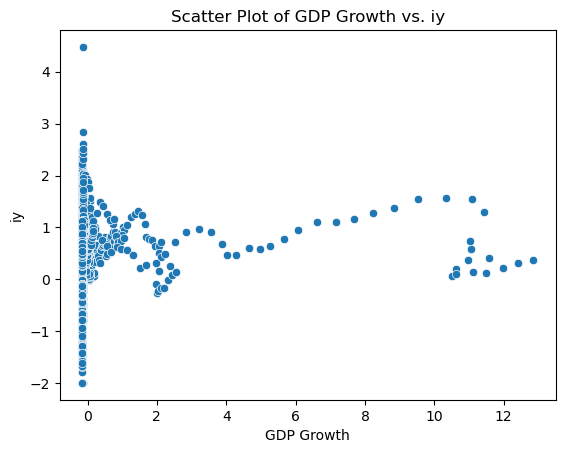

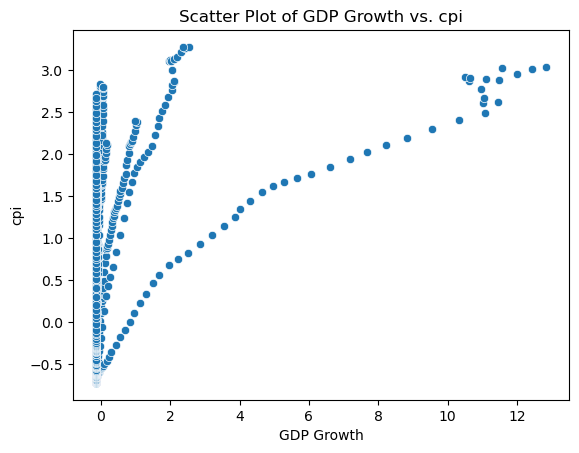

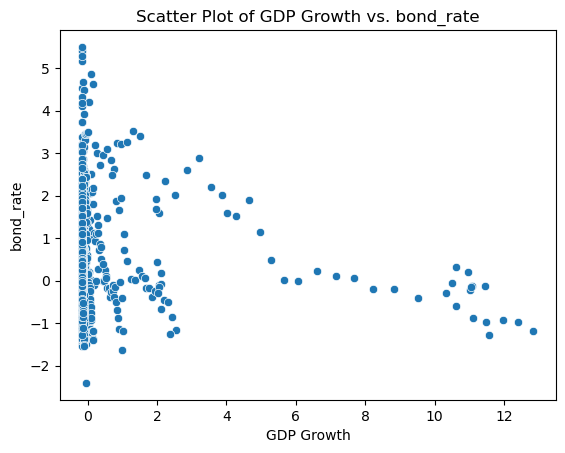

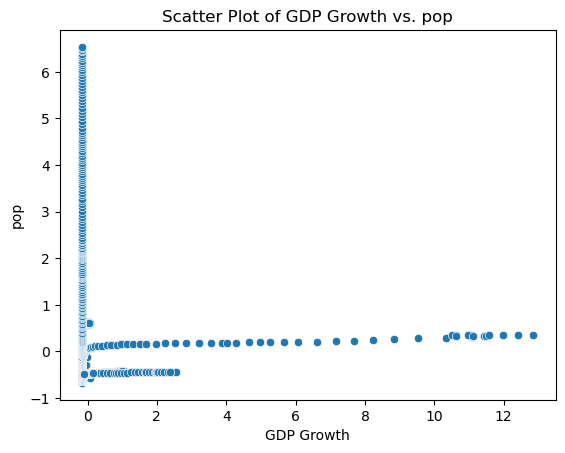

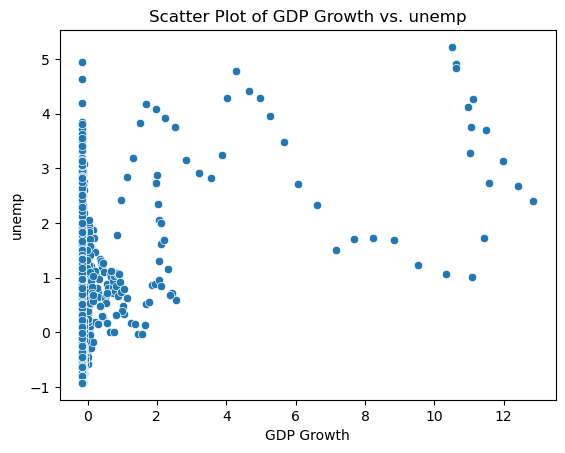

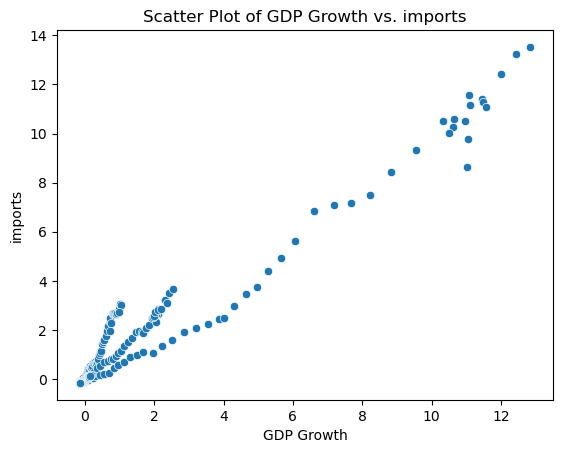

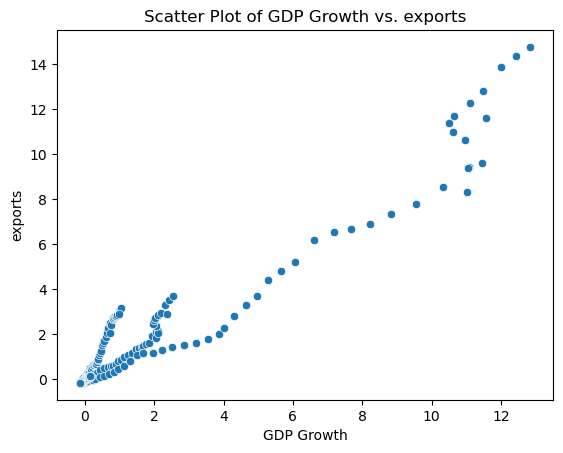

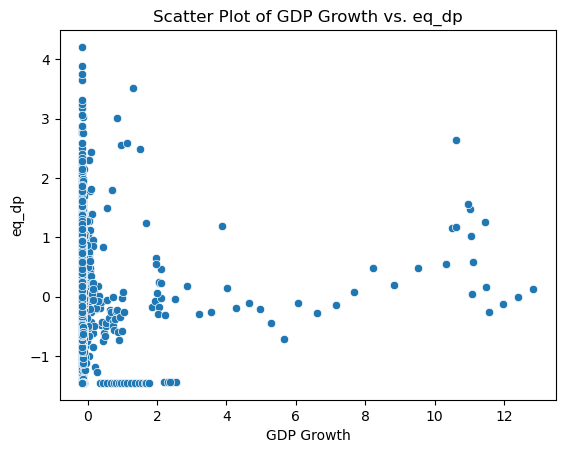

In [12]:
variables = ['iy', 'cpi', 'bond_rate', 'pop', 'unemp', 'imports', 'exports', 'eq_dp']
for variable in variables:
    sns.scatterplot(x='gdp', y=variable, data=df_choose)
    plt.title(f'Scatter Plot of GDP Growth vs. {variable}')  
    plt.xlabel('GDP Growth')  
    plt.ylabel(variable)  
    plt.show()  

# Linear regression, Backward elimination and cross validation

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

In [14]:
df_train, df_test = train_test_split(df_choose, test_size = 0.4, random_state = 999)
y = df_test['gdp']

In [15]:
model_full = smf.ols(formula = 'gdp~iy+cpi+bond_rate+pop+unemp+imports+exports+eq_dp', data = df_train).fit()
y_pre = model_full.predict(df_test)
a=r2_score(y, y_pre)
a

0.9759647925935329

In [16]:
model_red1 = smf.ols(formula = 'gdp~cpi+bond_rate+pop+unemp+imports+exports+eq_dp', data = df_train).fit()
y_pre = model_red1.predict(df_test)
b=r2_score(y, y_pre)
b

0.9759683592092017

In [17]:
model_red2 = smf.ols(formula = 'gdp~iy+bond_rate+pop+unemp+imports+exports+eq_dp', data = df_train).fit()
y_pre = model_red2.predict(df_test)
c=r2_score(y, y_pre)
c

0.9752108105275684

In [18]:
model_red3 = smf.ols(formula = 'gdp~iy+cpi+pop+unemp+imports+exports+eq_dp', data = df_train).fit()
y_pre = model_red3.predict(df_test)
d=r2_score(y, y_pre)
d

0.976083711401542

In [19]:
model_red4 = smf.ols(formula = 'gdp~iy+cpi+bond_rate+unemp+imports+exports+eq_dp', data = df_train).fit()
y_pre = model_red4.predict(df_test)
e=r2_score(y, y_pre)
e

0.9759141838988507

In [20]:
model_red5 = smf.ols(formula = 'gdp~iy+cpi+bond_rate+pop+imports+exports+eq_dp', data = df_train).fit()
y_pre = model_red5.predict(df_test)
f=r2_score(y, y_pre)
f

0.9756204943208765

In [21]:
model_red6 = smf.ols(formula = 'gdp~iy+cpi+bond_rate+pop+unemp+exports+eq_dp', data = df_train).fit()
y_pre = model_red6.predict(df_test)
g=r2_score(y, y_pre)
g

0.9632535549676465

In [22]:
model_red7 = smf.ols(formula = 'gdp~iy+cpi+bond_rate+pop+unemp+imports+eq_dp', data = df_train).fit()
y_pre = model_red7.predict(df_test)
h=r2_score(y, y_pre)
h

0.976063721353497

In [23]:
model_red8 = smf.ols(formula = 'gdp~iy+cpi+bond_rate+pop+unemp+exports+eq_dp', data = df_train).fit()
y_pre = model_red8.predict(df_test)
i=r2_score(y, y_pre)
i

0.9632535549676465

In [24]:
model_red9 = smf.ols(formula = 'gdp~iy+cpi+bond_rate+pop+unemp+imports+exports', data = df_train).fit()
y_pre = model_red9.predict(df_test)
j=r2_score(y, y_pre)
j

0.9759868977432241

In [25]:
import numpy as np
list = [a, b, c, d, e, f, g, h, i,j]
np.max(list)

0.976083711401542

When we drop the bond_rate, we get the highest test r2, so we choose to drop bond rate here.

In [26]:
model_red10 = smf.ols(formula = 'gdp~cpi+pop+unemp+imports+exports+eq_dp', data = df_train).fit()
y_pre = model_red10.predict(df_test)
k=r2_score(y, y_pre)
k

0.9760747771338665

In [27]:
model_red11 = smf.ols(formula = 'gdp~iy+pop+unemp+imports+exports+eq_dp', data = df_train).fit()
y_pre = model_red11.predict(df_test)
l=r2_score(y, y_pre)
l

0.9753207659978299

In [28]:
model_red12 = smf.ols(formula = 'gdp~iy+cpi+unemp+imports+exports+eq_dp', data = df_train).fit()
y_pre = model_red12.predict(df_test)
m=r2_score(y, y_pre)
m

0.9760301109907996

In [29]:
model_red13 = smf.ols(formula = 'gdp~iy+cpi+pop+imports+exports+eq_dp', data = df_train).fit()
y_pre = model_red13.predict(df_test)
n=r2_score(y, y_pre)
n

0.9757960771752605

In [30]:
model_red14 = smf.ols(formula = 'gdp~iy+cpi+pop+unemp+exports+eq_dp', data = df_train).fit()
y_pre = model_red14.predict(df_test)
o=r2_score(y, y_pre)
o

0.9633766709269702

In [31]:
model_red15 = smf.ols(formula = 'gdp~iy+cpi+pop+unemp+imports+eq_dp', data = df_train).fit()
y_pre = model_red15.predict(df_test)
p=r2_score(y, y_pre)
p

0.9762135979698512

In [32]:
model_red16 = smf.ols(formula = 'gdp~iy+cpi+pop+unemp+imports+exports', data = df_train).fit()
y_pre = model_red16.predict(df_test)
q=r2_score(y, y_pre)
q

0.9760406335349366

In [33]:
list2 = [d, k,l, m, n, o, p, q]
np.max(list2)

0.9762135979698512

When we drop bond rate and exports, we get the highest test r2, so we choose to drop bond rate and exports here.

In [34]:
model_red16 = smf.ols(formula = 'gdp~cpi+pop+unemp+imports+eq_dp', data = df_train).fit()
y_pre = model_red16.predict(df_test)
r=r2_score(y, y_pre)
r

0.9761991094127797

In [35]:
model_red17 = smf.ols(formula = 'gdp~iy+pop+unemp+imports+eq_dp', data = df_train).fit()
y_pre = model_red17.predict(df_test)
s=r2_score(y, y_pre)
s

0.9755603719870275

In [36]:
model_red18 = smf.ols(formula = 'gdp~iy+pop+cpi+imports+eq_dp', data = df_train).fit()
y_pre = model_red18.predict(df_test)
t=r2_score(y, y_pre)
t

0.9758597680652338

In [37]:
model_red19 = smf.ols(formula = 'gdp~iy+pop+cpi+unemp+eq_dp', data = df_train).fit()
y_pre = model_red19.predict(df_test)
u=r2_score(y, y_pre)
u

0.18435154678909604

In [38]:
model_red20 = smf.ols(formula = 'gdp~iy+pop+cpi+unemp+imports', data = df_train).fit()
y_pre = model_red20.predict(df_test)
v=r2_score(y, y_pre)
v

0.9761791283660692

In [39]:
list3 = [p, r,s,t,u,v]
np.max(list3)

0.9762135979698512

When we drop bond rate and exports, we get the highest test r2, so we choose to drop bond rate and exports here. As a result, the final model should drop bond rate and exports which is the model_red15 which has r2 - 0.9762135979698512.

In [40]:
model_red15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gdp   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     6252.
Date:                Sun, 28 Apr 2024   Prob (F-statistic):               0.00
Time:                        00:54:58   Log-Likelihood:                 395.42
No. Observations:                1630   AIC:                            -776.8
Df Residuals:                    1623   BIC:                            -739.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0018      0.005     -0.389      0.697      -0.011       0.007
iy             0.0046      0.005      0.871      0.384      -0.006       0.015
cpi           -0.0544      0.007     -8.275      0.000      -0.067      -0.041
pop            0.0174      0.005      3.407      0.001       0.007       0.027
unemp          0.0435      0.006      7.602      0.000       0.032       0.055
imports        0.9701      0.006    176.275      0.000       0.959       0.981
eq_dp          0.0023      0.005      0.469      0.639      -0.007       0.012
==============================================================================
Omnibus:                     1379.773   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           157235.072
Skew:                          -3.334   Prob(JB):                         0.00
Kurtosis:                      50.651   Cond. No.                         2.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Lasso model and KFold

In [41]:
from sklearn.linear_model import Lasso

In [42]:
cross_val = KFold(n_splits=5, shuffle = True, random_state = 300) # k = 5 cross validation

In [43]:
y = df_choose['gdp']
predictors = df_choose.drop(['gdp'], axis = 1)

In [44]:
lamda=[]
df_r2=[]
for i in np.arange(0, 1, 0.01):
    lamda.append(i)
# get a lamda list

In [45]:
for x in lamda:
    model = Lasso(alpha = x, max_iter = 1000)
    test1_fold_r2 = cross_val_score(model, predictors, y, cv = cross_val, scoring = 'r2')
    df_r2.append([x, test1_fold_r2.mean(), test1_fold_r2.std()])
df_r2_1 = pd.DataFrame(df_r2, columns = ['lamda', 'average test r2', 'std test r2'])
df_r2_1

B:\miniconda\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
B:\miniconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
B:\miniconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.156e+01, tolerance: 1.850e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
B:\miniconda\Lib\site-pac

,lamda,average test r2,std test r2
0,0.00,0.950834,0.044766
1,0.01,0.949843,0.047117
2,0.02,0.948337,0.047115
3,0.03,0.947795,0.046402
4,0.04,0.947176,0.045700
...,...,...,...
95,0.95,0.104590,0.131170
96,0.96,0.098933,0.124257
97,0.97,0.093213,0.117271
98,0.98,0.087432,0.110211


In [46]:
df_r2_1.sort_values(by=['average test r2'], ascending=False)

,lamda,average test r2,std test r2
0,0.00,0.950834,0.044766
1,0.01,0.949843,0.047117
2,0.02,0.948337,0.047115
3,0.03,0.947795,0.046402
4,0.04,0.947176,0.045700
...,...,...,...
95,0.95,0.104590,0.131170
96,0.96,0.098933,0.124257
97,0.97,0.093213,0.117271
98,0.98,0.087432,0.110211


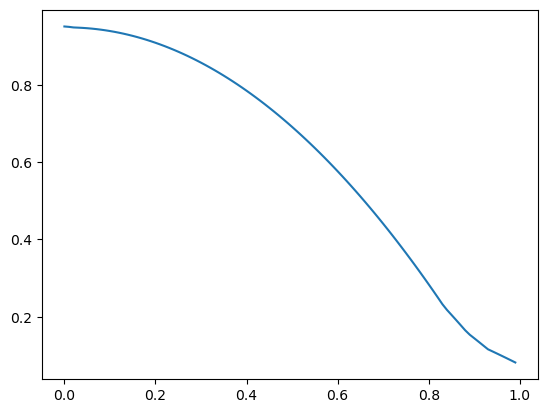

In [47]:
plt.plot(df_r2_1['lamda'].values, df_r2_1['average test r2'].values)

In [48]:
model_lasso = Lasso(alpha = 0, max_iter = 1000)
model_lasso.fit(predictors, y)

B:\miniconda\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
B:\miniconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
B:\miniconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.364e+01, tolerance: 2.718e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0)

In [49]:
df_slope = pd.DataFrame({'coef':model_lasso.coef_.T}, index = predictors.columns)
print(model_lasso.intercept_)
df_slope

-4.037229728394959e-18


,coef
iy,0.001954
cpi,-0.047665
bond_rate,0.007564
pop,0.013841
unemp,0.038292
imports,1.181164
exports,-0.196231
eq_dp,0.003546


In [50]:
y_pred3 = model_lasso.predict(predictors)
r2 = r2_score(y, y_pred3)
r2

0.9678891662912288

Thus, for lasso model, we have test r2 which is 0.9678891662912288

# Random Forest, Cross validation and KFold

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  
from sklearn.ensemble import RandomForestRegressor   
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [52]:
y_test = df_test['gdp']
y_train = df_train['gdp']
x_test = df_test.drop(['gdp'], axis = 1)
x_train = df_train.drop(['gdp'], axis = 1)

In [53]:
n_estimators_options = []
for n in np.arange(1, 31, 1):
    n_estimators_options.append(n)
n_estimators_options

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [54]:
scores = []
for trees in n_estimators_options:
    model_forest = RandomForestRegressor(n_estimators=trees, random_state=42)
    model_score = cross_val_score(model_forest, x_train, y_train, cv=5).mean()  
    scores.append(model_score)
    print(f"n_estimators={trees}: Cross-Validation Accuracy = {model_score}")

n_estimators=1: Cross-Validation Accuracy = 0.9475845672876755
n_estimators=2: Cross-Validation Accuracy = 0.9720177221718819
n_estimators=3: Cross-Validation Accuracy = 0.9757700196255661
n_estimators=4: Cross-Validation Accuracy = 0.980957283129096
n_estimators=5: Cross-Validation Accuracy = 0.9810042429701726
n_estimators=6: Cross-Validation Accuracy = 0.9825294659639526
n_estimators=7: Cross-Validation Accuracy = 0.9822742386445643
n_estimators=8: Cross-Validation Accuracy = 0.9835856858953738
n_estimators=9: Cross-Validation Accuracy = 0.9836239571358429
n_estimators=10: Cross-Validation Accuracy = 0.983518937661008
n_estimators=11: Cross-Validation Accuracy = 0.9853322070284373
n_estimators=12: Cross-Validation Accuracy = 0.9861482442567298
n_estimators=13: Cross-Validation Accuracy = 0.9854343082524663
n_estimators=14: Cross-Validation Accuracy = 0.9858156330647938
n_estimators=15: Cross-Validation Accuracy = 0.9859824501969079
n_estimators=16: Cross-Validation Accuracy = 0.9862

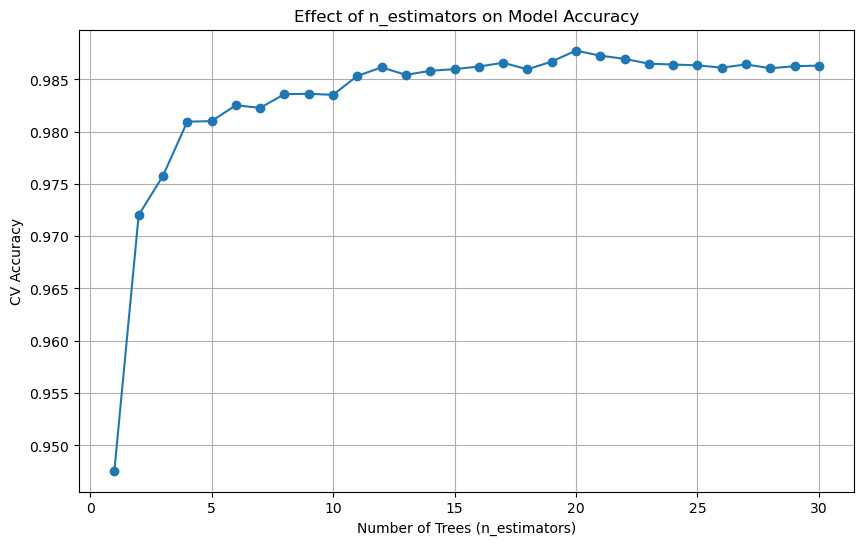

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_options, scores, marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('CV Accuracy')
plt.title('Effect of n_estimators on Model Accuracy')
plt.grid(True)
plt.show()

In [56]:
model_forest = RandomForestRegressor(n_estimators=20, random_state=42)  
model_forest.fit(x_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=42)

In [57]:
y_pred = model_forest.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2_rf1 = r2_score(y_test, y_pred)
print("r square:", r2_rf1)

Mean Squared Error: 0.05141886725516492
r square: 0.9569966535868509


Thus, for random forest and kfold, we have test r2 which is 0.9569966535868509 and test mse which is 0.05141886725516492

# Apply PCA in model of random forest

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [59]:
pca = PCA(n_components=5) # reduce original model to 5 components

In [60]:
model = RandomForestRegressor(random_state=99)
pipeline = Pipeline([
    ('pca', pca),
    ('regressor', model)
])

In [61]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=5)),
                ('regressor', RandomForestRegressor(random_state=99))])

In [62]:
y_pred2 = pipeline.predict(x_test)
mse2 = mean_squared_error(y_test, y_pred2)
print("Mean Squared Error:", mse2)
r2_rf2 = r2_score(y_test, y_pred2)
print("r square:", r2_rf2)

Mean Squared Error: 0.011654947472006918
r square: 0.9902525712774152


Thus, for PCA and random forest, we have test r2 which is 0.9902525712774152, and test mse which is 0.011654947472006918

# PCA and Support Vector Regression (SVR)

In [63]:
from sklearn.svm import SVR

In [64]:
pca = PCA(n_components=None)  
pca.fit(df_choose)
ea_ratio = pca.explained_variance_ratio_
cu_v = np.cumsum(ea_ratio)
ea_ratio, cu_v

(array([0.38193528, 0.17640639, 0.1523448 , 0.09900811, 0.0764241 ,
        0.06791244, 0.04242539, 0.00297413, 0.00056936]),
 array([0.38193528, 0.55834167, 0.71068647, 0.80969458, 0.88611868,
        0.95403112, 0.99645651, 0.99943064, 1.        ]))

In [65]:
n_components = np.where(cu_v > 0.9)[0][0] + 1

In [66]:
svr = SVR(kernel='rbf')
svr.fit(x_train, y_train)

SVR()

In [67]:
y_pred4 = svr.predict(x_test)

In [68]:
r2_svr = r2_score(y_test, y_pred4)
r2_svr

0.5723502611795106

Thus, we can know the r square of SVR model which base on PCA is 0.5723502611795106

# Use K-means clustering to group countries or periods into clusters based on similarities in economic indicators 

In [69]:
from sklearn.cluster import KMeans

B:\miniconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
B:\miniconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
B:\miniconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
B:\miniconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can av

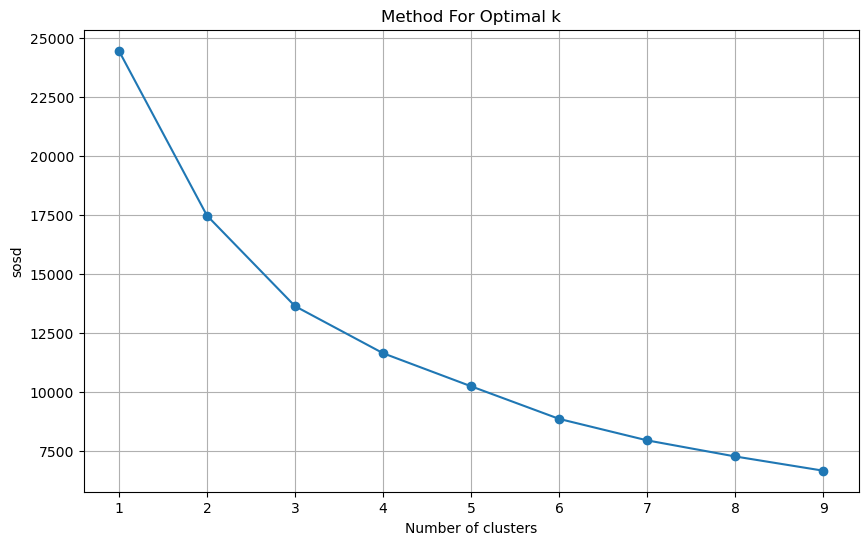

In [70]:
k_range = []
for v in np.arange(1, 10, 1):
    k_range.append(v)

sosd = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_choose)
    sosd.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sosd, marker='o')
plt.title('Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('sosd')
plt.grid(True)
plt.show()

In [71]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_choose)
df_choose['cluster'] = clusters

B:\miniconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
B:\miniconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
C:\Users\59747\AppData\Local\Temp\ipykernel_36468\988954696.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_choose['cluster'] = clusters


In [72]:
df_choose.sample(n=30, random_state=1) #show the random dataset to find the similarity

,gdp,iy,cpi,bond_rate,pop,unemp,imports,exports,eq_dp,cluster
1936,-0.149730,1.361564,1.165215,-0.303855,2.062409,-0.243130,-0.160113,-0.156410,-1.141734,1
255,-0.018483,0.649827,0.011833,1.137816,-0.461292,-0.382399,0.079530,0.070237,0.876690,3
565,-0.136220,1.458885,0.696953,0.020817,-0.534005,-0.597075,-0.148119,-0.145560,-0.051143,3
1575,-0.149752,-1.991951,-0.676749,-1.382146,-0.610468,-0.925916,-0.160118,-0.156418,-1.455822,0
1997,-0.149659,-0.329928,-0.617568,-0.476353,-0.555866,-0.095044,-0.159905,-0.156204,0.659645,3
1437,-0.149761,-0.917599,-0.598098,-0.450225,0.419745,-0.619839,-0.160118,-0.156418,0.459862,3
516,-0.149208,-1.991951,-0.434676,-0.215067,-0.585390,2.123600,-0.159789,-0.156242,-1.455822,0
2067,-0.136549,0.517691,0.212717,1.471682,-0.379103,-0.058390,-0.138566,-0.135743,1.985816,3
2040,-0.149002,-1.991951,-0.447512,-0.493772,-0.464753,-0.469093,-0.159275,-0.156048,-1.455822,0
2179,-0.149488,0.509793,-0.643311,-0.093133,-0.612396,1.404976,-0.159948,-0.156293,1.206359,3
